In [125]:
import os.path as osp
from util.experiment_setup import load_log
from util.files import find_files_in_folder
from matplotlib import pyplot as plt
import numpy as np

In [115]:
train1 = "../models/bg_transform/mod3_retinal_scale0.1-3.5"
train2 = "../models/bg_transform/mod3_retinal_scale0.5-3"
log1 = load_log(osp.join(osp.split(train1)[0],"logs",osp.split(train1)[1]+".yaml"))
log2 = load_log(osp.join(osp.split(train2)[0],"logs",osp.split(train2)[1]+".yaml"))

In [122]:
all_log_files = find_files_in_folder("../models/bg_transform/logs", ".yaml")

In [123]:
logs = [load_log(f) for f in all_log_files]

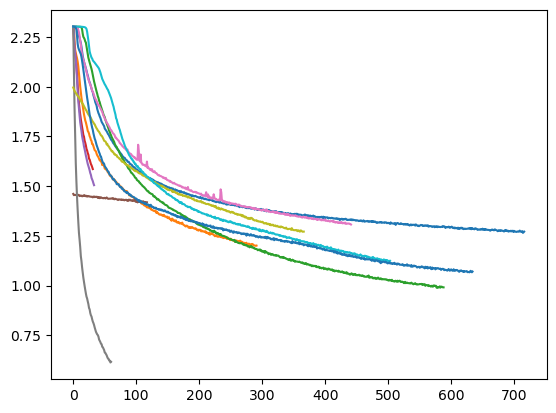

In [124]:
for log in logs:
    plt.plot(log["train_loss"])
plt.legend([osp.split(model_path)[1] for model_path in all_log_files], loc=(1.04, 0))
plt.show()

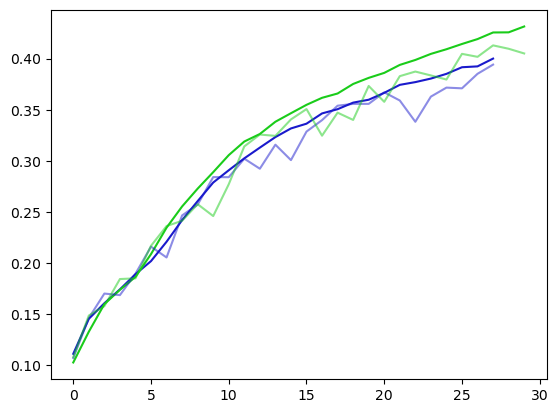

In [117]:
plt.plot(log1["train_acc"], c=(0.1,0.1,0.8))
plt.plot(log2["train_acc"], c=(0.1,0.8,0.1))
plt.plot(np.array(log1["val_acc"])/100, c=(0.1,0.1,0.8,0.5))
plt.plot(np.array(log2["val_acc"])/100, c=(0.1,0.8,0.1,0.5))
plt.show()